# In Depth: Principal Component Analysis
Up until now, we have been looking in depth at supervised learning estimator: those estimators that predict labels based on labeled training data. Here we begin looking at several unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels.

In this section, we explore what is perhaps one of the most broadly used unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a <b>dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering</b>, and much more. After a brief conceptual discussion of PCA algorithm we will see some examples of these further applications.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Introduction Principal Component Analysis
PCA is a fast and flexible unsupervised method for dimensionality reduntion in data, which we saw briefly in Introduction. Its behaviour is easiest to visualize by looking at 2-D dataset. Consider the following 200 points:

(-2.729271205627196,
 2.570274439335261,
 -0.9326181575178751,
 1.0044138302291827)

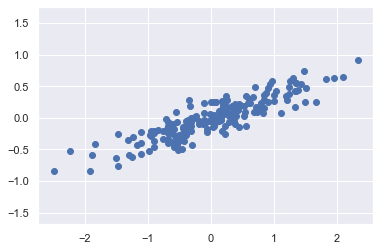

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

By eye it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression data we explored in Linear Regression, but the problem setting here is slightly different, rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the <b>relationship between the x and y values</b>.

In principal component analysis, the relationship is quantified by finding a list of <b>principal axes</b> in the data and using those axes to describe the dataset. Using the PCA estimator we can compute this.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

The fit learns some quantities form the data, most importantly the "<b>components</b>" and "<b>explained variance</b>".

In [13]:
print('PCA Cpmponents: ', pca.components_)
print('PCA Explained Variance: ', pca.explained_variance_)

PCA Cpmponents:  [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
PCA Explained Variance:  [0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

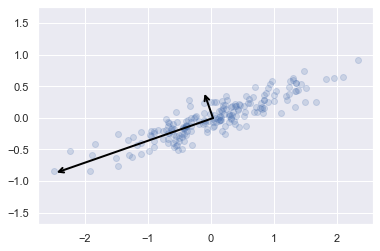

In [14]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color='black',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

Plot the principal components:

[(-3.0, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5.0, 5.0),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

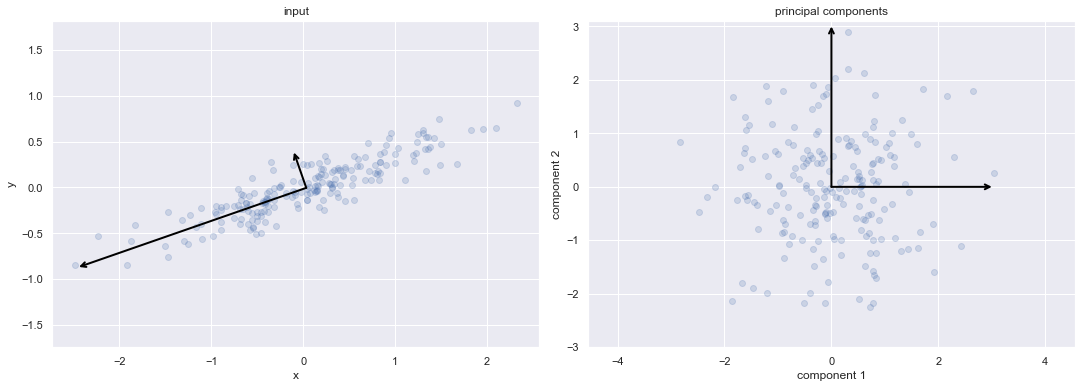

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

This transformation from data axes to principal axes is an <b>affine transformation</b>, which basically means it is composed of a <b>translation, rotation, and uniform scaling</b>.

This transformation from data axes to principal axes is an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

# PCA as a dimensionality Reduction
Using PCA for dimensionality reduction involves <b>zeroing out one or more of the smallest principal components</b>, resulting in a lower-dimensional projection of the data that <b>preserves the maximal data variance</b>.

Here is an example of using PCA as a dimensionality reduction transform:

In [16]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

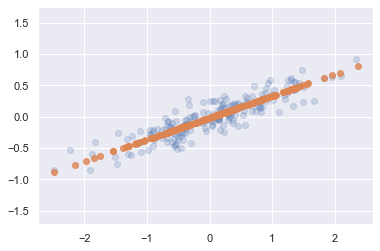

In [17]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the <b>information along the least important principal axis or axes is removed</b>, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.